Setup libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

And the connection to Google Drive to get the data:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### LOADING DATA

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/Fetal Health Classification/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### DATA ANALYSIS¶

**Plot histograms for all features**

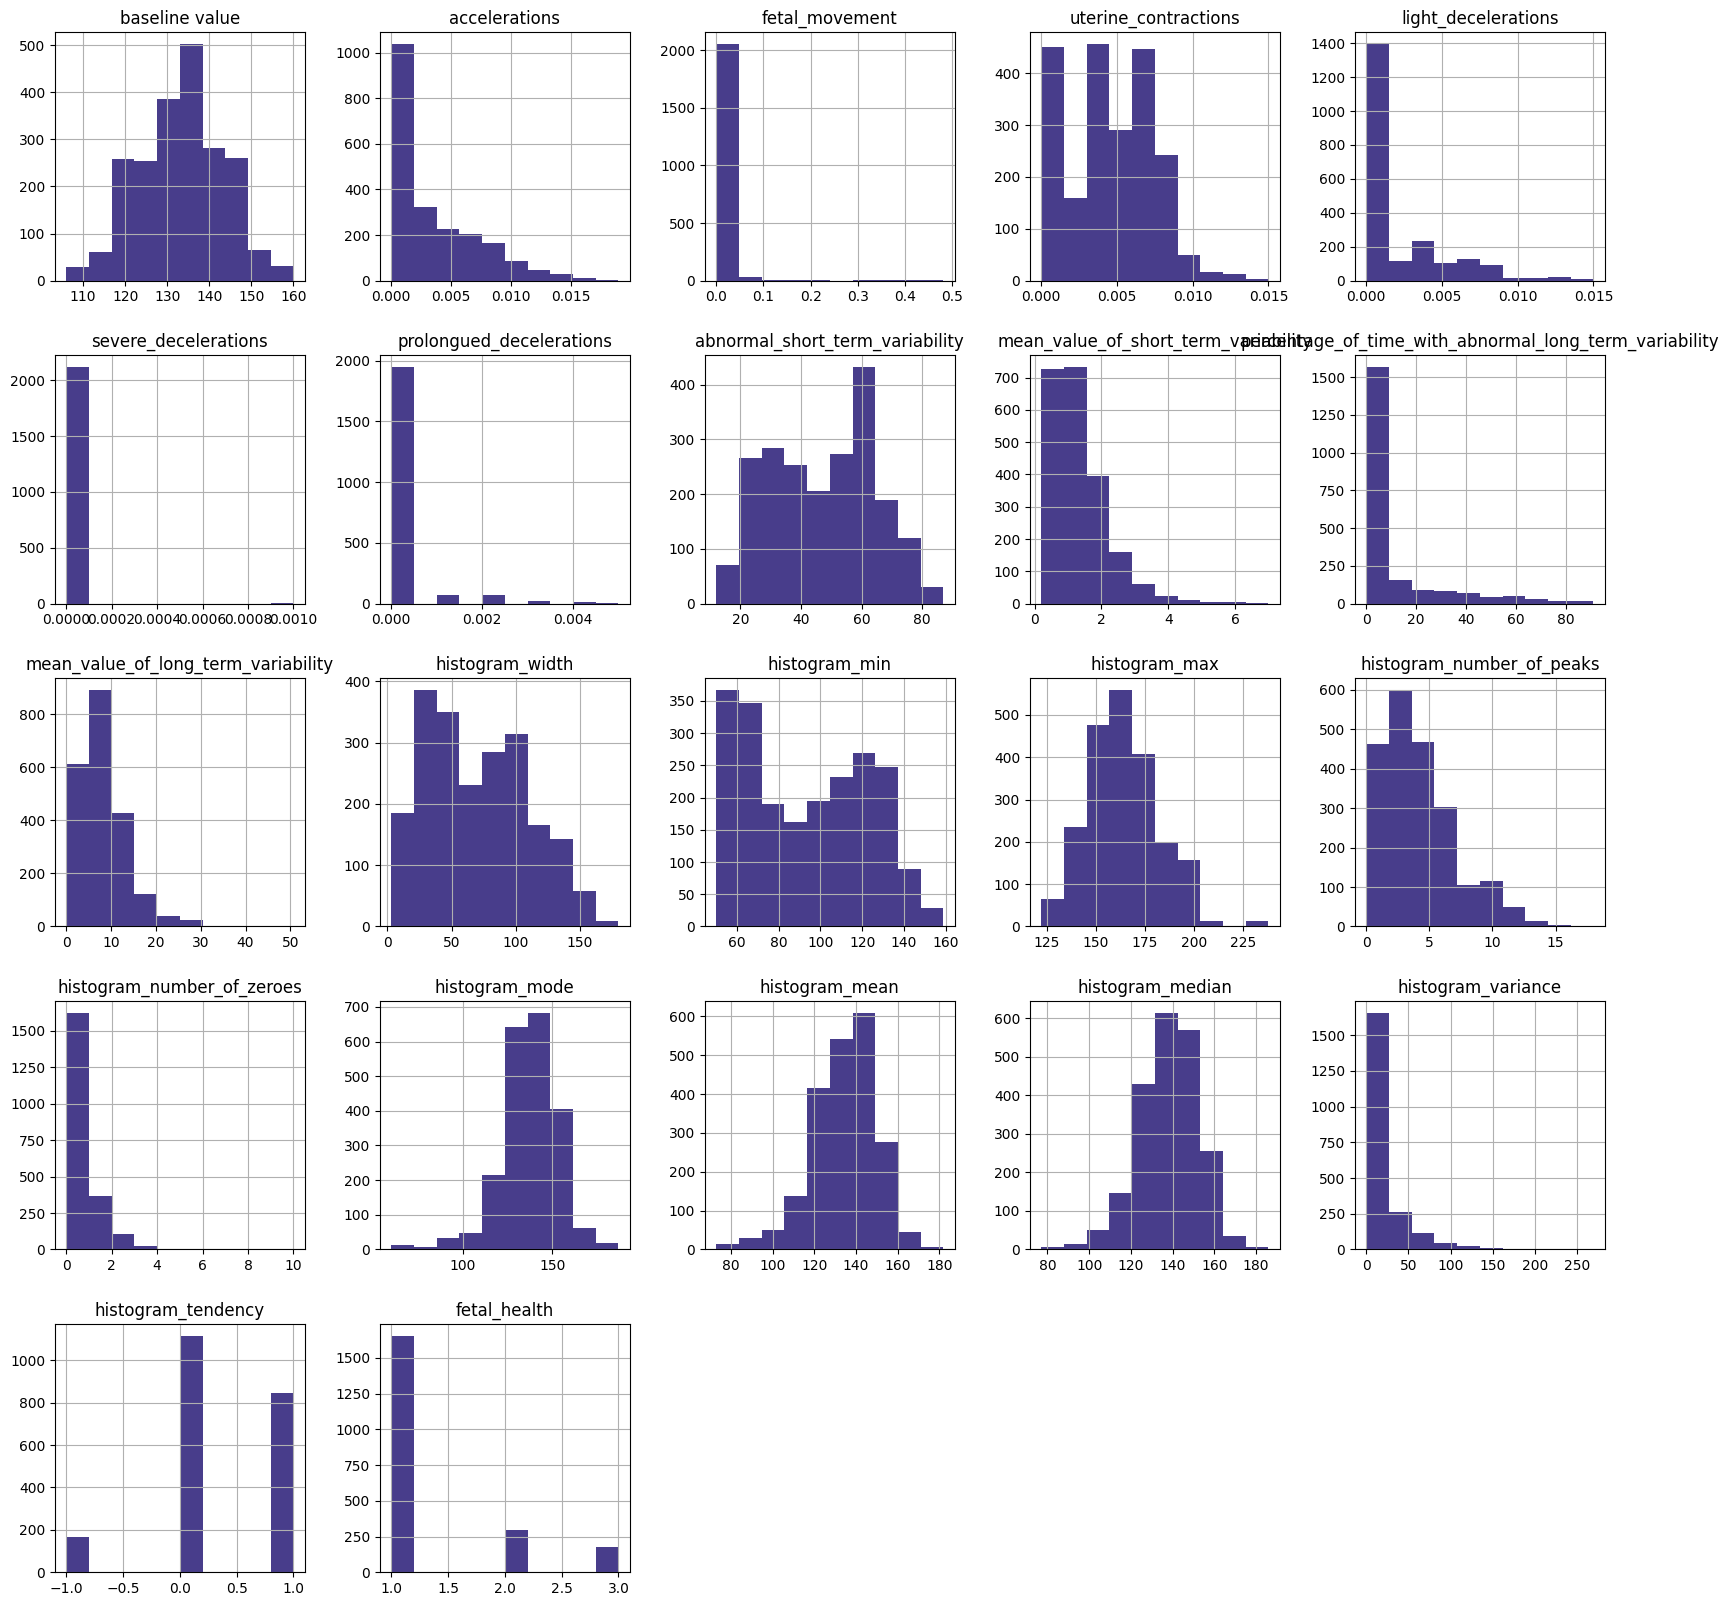

In [ ]:
hist_plot = data.hist(figsize = (20,20), color = "#483D8B")

**Note**:

All the attributes more or less are mildly skewed and are normally distributed except the features "light_decelerations", "percentage_of_time_with_abnormal_long_term_variability", etc.

**Evaluating Target Feature**

<ipython-input-8-542b18c7b5d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= data, x="fetal_health", palette=colors)


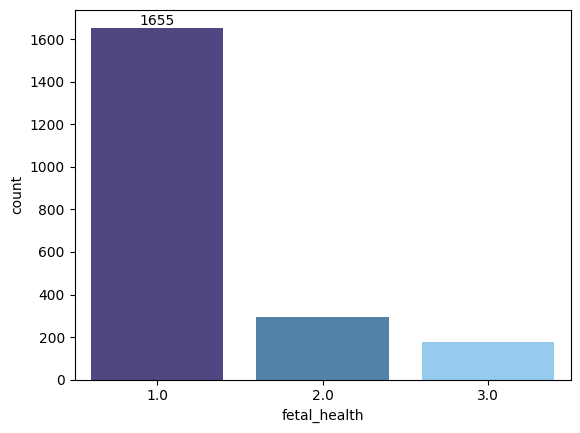

In [ ]:
colors=["#483D8B","#4682B4", "#87CEFA"]
ax = sns.countplot(data= data, x="fetal_health", palette=colors)
ax.bar_label(ax.containers[0])
plt.show()

**Note**:

Target labels are highly imbalanced as can be seen from the plot. This is a case that tends to provide misleading classification accuracy.

The performance measures that would provide better insight include:

- Confusion Matrix
- Precision
- Recall
- F1 Score


**Correlation Matrix**

<Axes: >

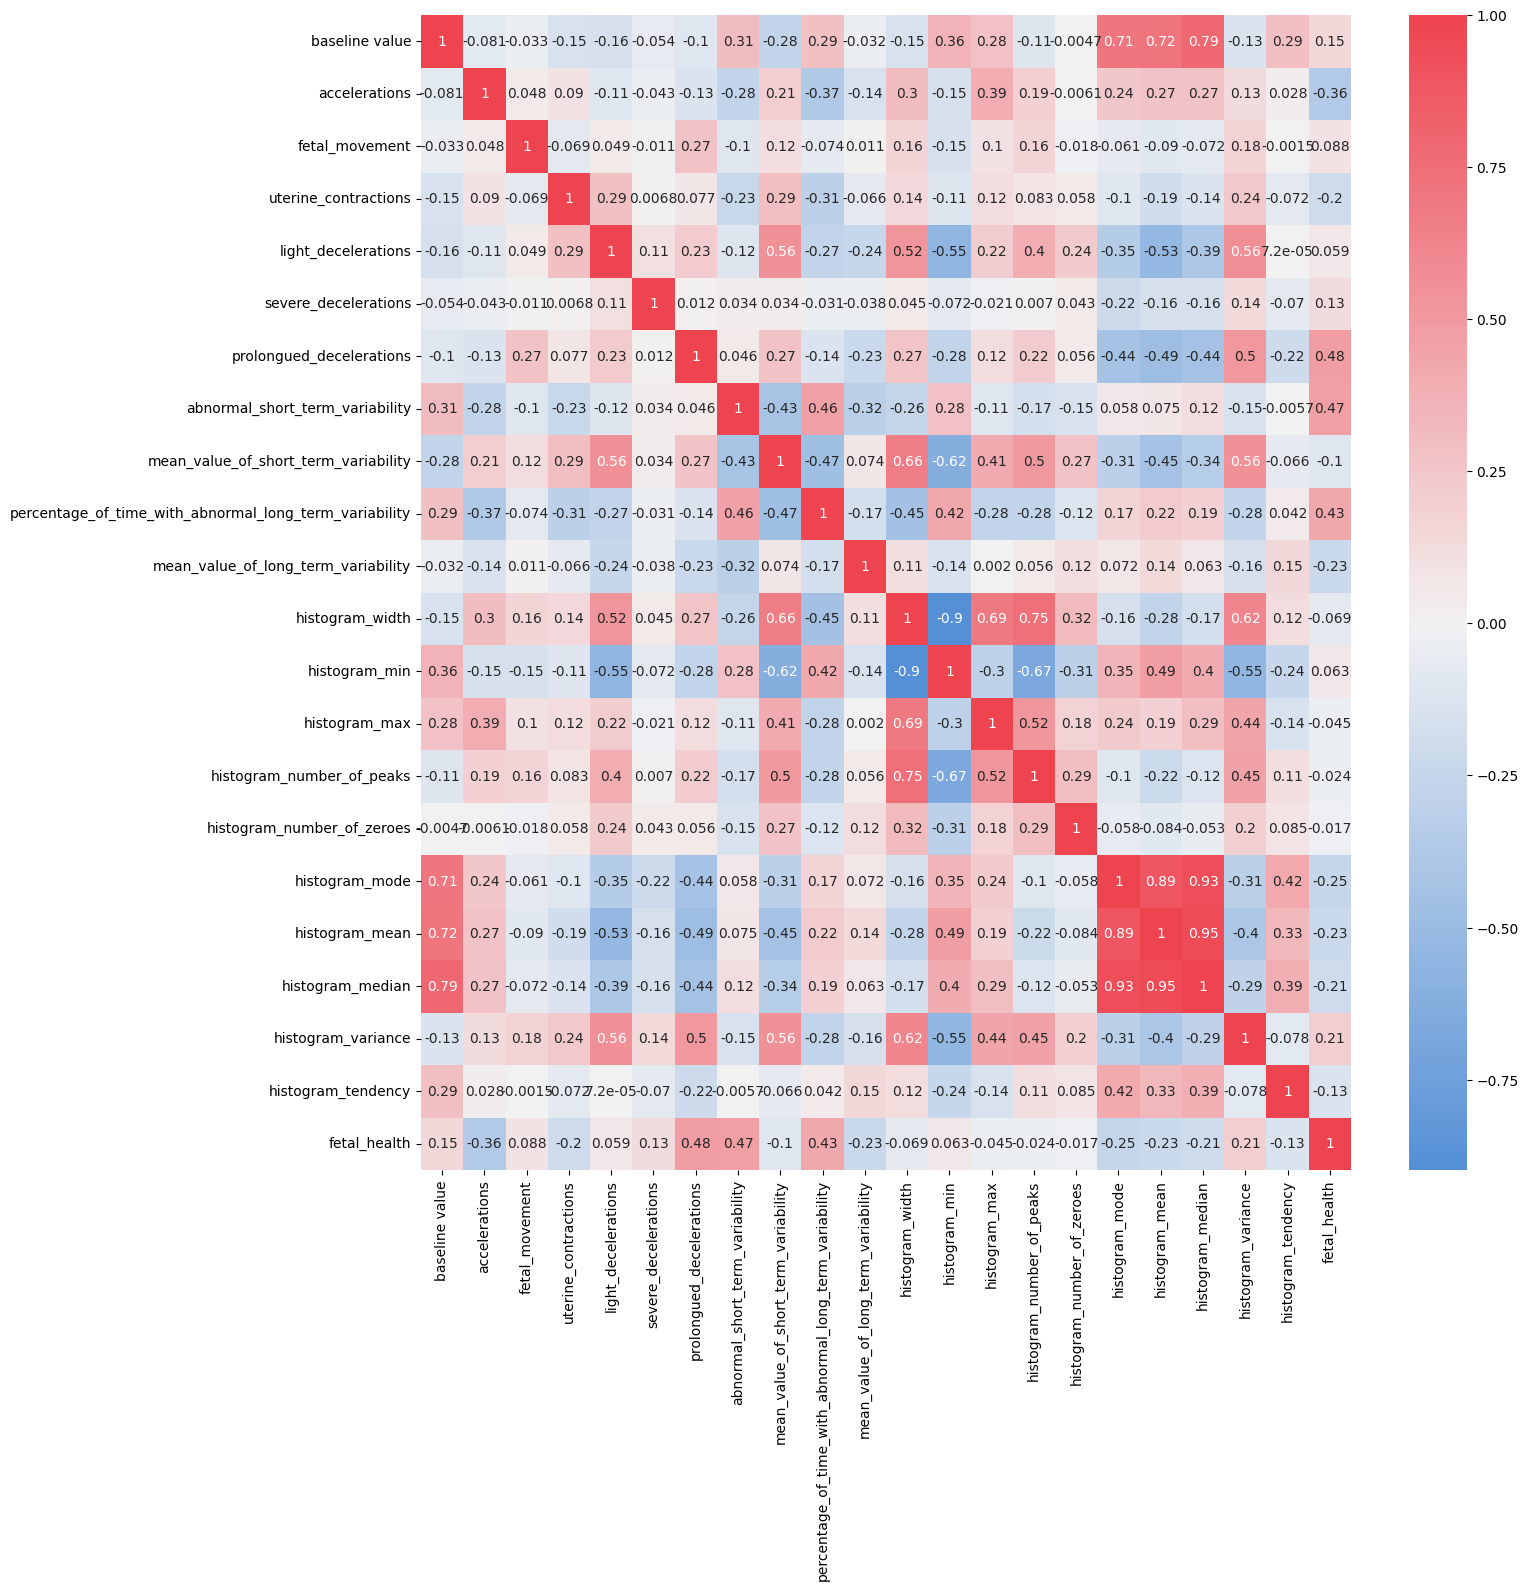

In [ ]:
# Examining correlation matrix using heatmap
corrmat= data.corr()
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

**Note**:
- Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with higher correlation with **fetal_health**.
- Features, "histogram_number_of_zeroes", "histogram_number_of_peaks", "histogram_max", "histogram_width" shows correlation less than the |0.1| hence, can be **dropped** off before feeding in to the algorithm.

### MODEL SELECTION AND BUILDING
In this section we will:

- Set up features(X) and target(y)
- Scale the features
- Split training and test sets
- Model selection
- Hyperparameter tuning

In [ ]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

In [ ]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


**Checking for Outliers**

<ipython-input-12-c1107129cc4a>:3: UserWarning: 
The palette list has fewer values (3) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_scaled,palette = colors)


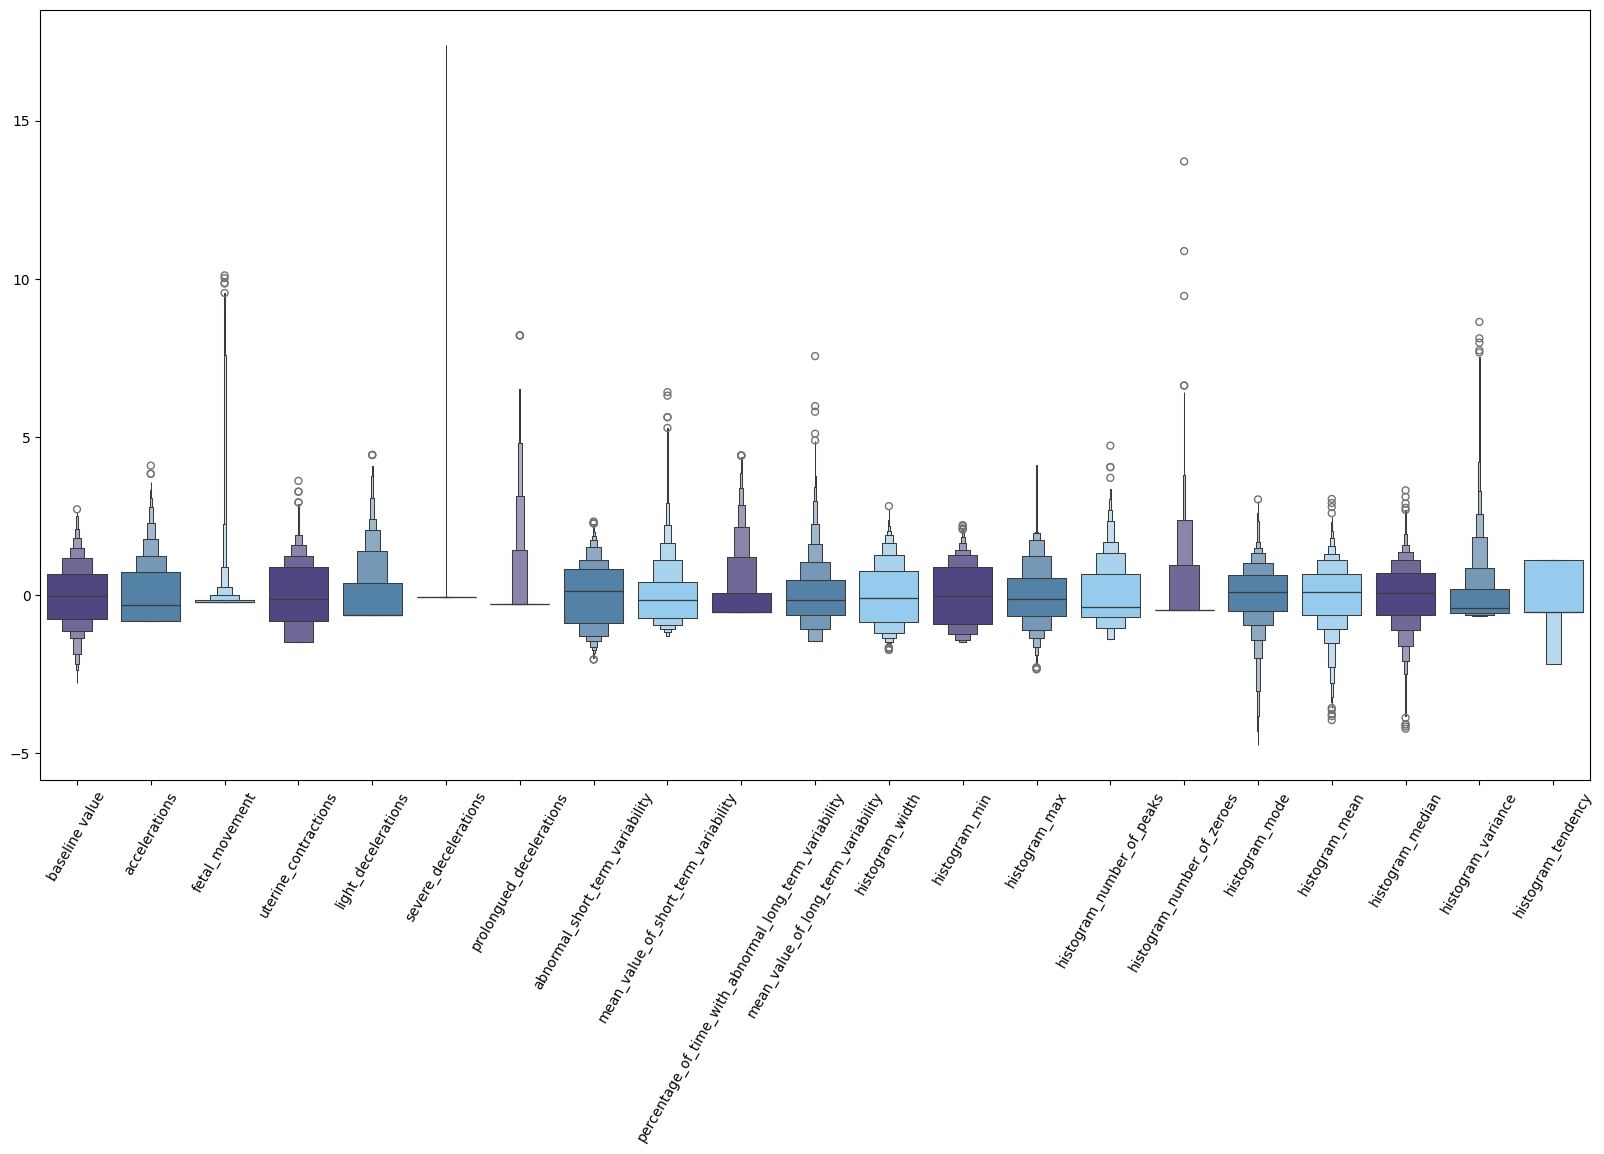

In [ ]:
#Plotting the scaled features using boxen plots
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

**Note**:

- The plot clearly indicates that all the features are in same range since we have scaled the data.
- Outliers can be spotted in certain features, which we have to make a call whether to take it along or drop it off.
- Assuming outliers aren't cause of the typo or measurement error (human error) we aren't taking it down to avoid the overfitting of the model as well as the loss of information.


**Splitting Train & Test Set**

In [ ]:
# Splitting the training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

**Model Selection**

In [ ]:
# Building pipelines of model for various classifiers

pipeline_lr = Pipeline([('lr_classifier',LogisticRegression())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_gbcl, pipeline_rf, pipeline_knn, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Gradient Boost', 3:'RandomForest', 4: 'KNN', 5:'SVC'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Cross validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: 0.865315 
Decision Tree: 0.924167 
Gradient Boost: 0.945294 
RandomForest: 0.935904 
KNN: 0.887070 
SVC: 0.851214 


**Note**:

Gradient Boost among the six models performs best with our data so we shall proceed with it.

**Grandient Boost Classifier**

In [ ]:
# Baseline model of gradient boosting classifier with default parameters:
gbcl = GradientBoostingClassifier()
gbcl_model = gbcl.fit(X_train, y_train)
print(f"Baseline Gradient Boosting Classifier Score: {round(gbcl_model.score(X_test, y_test), 2)}")

pred_gbcl = gbcl_model.predict(X_test)

Baseline Gradient Boosting Classifier Score: 0.95


In [ ]:
# Cross validate Gradient Boosting Classifier model
scores_gbcl = cross_val_score(gbcl, X_train, y_train, cv = 8, n_jobs = 2, scoring = "accuracy")

print(f"CV scores for Gradient Boosting Classifier model:\n{scores_gbcl}")
print(f"CV Mean score: {round(scores_gbcl.mean(), 2)}")

CV scores for Gradient Boosting Classifier model:
[0.96244131 0.93896714 0.92488263 0.94366197 0.97169811 0.95283019
 0.93396226 0.95754717]
CV Mean score: 0.95


**GridSearchCV**

Grid Search CV (Cross-Validation) is a method used to tune the hyperparameters of a model to find the best possible combination of parameters that yields the highest performance as measured by a predefined score.

In [ ]:
# Define the Parameter Grid
# Create a dictionary with the parameters to tune
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
              "n_estimators": [200, 350, 500, 750], #The number of boosting stages to be run.A larger number usually results in a more complex model.
              "max_depth": [3, 6, 8]#This limits the number of nodes in the tree. Deeper trees can model more complex relationships but might overfit
              }

In [ ]:
 # Setup GridSearchCV
GridSearchCV_gbcl = GridSearchCV(estimator=GradientBoostingClassifier(),
                                param_grid=parameters,
                                cv=2,
                                verbose=1,
                                n_jobs=3, # Number of jobs to run in parallel
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
# Fit the Model
GridSearchCV_gbcl.fit(X_train, y_train)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'loss': ['deviance'], 'max_depth': [3, 6, 8],
                         'n_estimators': [200, 350, 500, 750]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# Review the Results
best_parameters = GridSearchCV_gbcl.best_params_
print(f"Best parameters for the model:\n{best_parameters}")

Best parameters for the model:
{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 6, 'n_estimators': 200}


In [ ]:
# Testing with the best parameters
gbcl = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=0.5, loss="deviance",
                                  max_depth=6, max_features="log2", min_samples_leaf=0.3,
                                  min_samples_split=0.5, n_estimators=200, random_state=25)

gbcl_mod = gbcl.fit(X_train, y_train)

score_gbcl_train = gbcl_mod.score(X_train, y_train)
score_gbcl_test = gbcl_mod.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [ ]:
print(f"r^2(coefficient of determination) on training set = {round(score_gbcl_train, 3)}")
print(f"r^2(coefficient of determination) on testing set = {round(score_gbcl_test, 3)}")

r^2(coefficient of determination) on training set = 0.938
r^2(coefficient of determination) on testing set = 0.894


In [ ]:
# Getting score on the Test set from pipeline_gncl
pred_gbcl = pipeline_gbcl.predict(X_test)
accuracy = accuracy_score(y_test, pred_gbcl)
print(f" Testing Score of the model is {accuracy}")

 Testing Score of the model is 0.9553990610328639


In [ ]:
# Getting the Classification report
print(classification_report(y_test, pred_gbcl))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       324
         2.0       0.91      0.82      0.86        60
         3.0       0.93      0.95      0.94        42

    accuracy                           0.96       426
   macro avg       0.93      0.92      0.92       426
weighted avg       0.95      0.96      0.95       426



# Classification Report

The classification report provides several important metrics for each class of the classification:

## Metrics per Class

- **Class 1.0**
  - Precision: 0.97
  - Recall: 0.98
  - F1-score: 0.97
  - Support: 324

- **Class 2.0**
  - Precision: 0.91
  - Recall: 0.82
  - F1-score: 0.86
  - Support: 60

- **Class 3.0**
  - Precision: 0.93
  - Recall: 0.95
  - F1-score: 0.94
  - Support: 42

## Averages

- **Accuracy**: 0.96 (Total predictions: 426)
- **Macro Average** (Unweighted mean per label)
  - Precision: 0.93
  - Recall: 0.92
  - F1-score: 0.92
- **Weighted Average** (Average weighted by support)
  - Precision: 0.95
  - Recall: 0.96
  - F1-score: 0.95

The report indicates a well-performing model with high precision, recall, and F1 scores across all classes. The accuracy of the model is 0.96, meaning that it correctly classified 96% of all instances. The weighted average metrics are particularly important as they take into account the imbalance in support across classes.


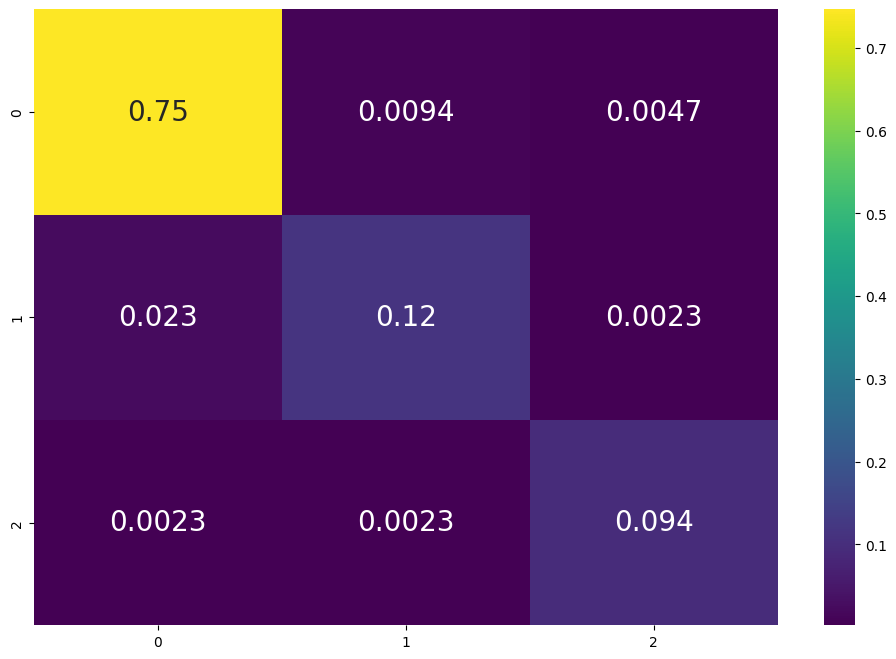

In [ ]:
# Getting the Confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_gbcl)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis',annot = True, annot_kws = {'size':20})
plt.show()

Here's how the confusion matrix works:

- Each row of the matrix represents the instances in an actual class (the truth).
- Each column represents the instances in a predicted class.

This particular confusion matrix suggests that:

- Class 0 is being predicted with high accuracy by the model.
- Class 1 seems to be confused with the other classes more often, indicated by the lower value for true positives.
- Class 2 has a moderate true positive rate but also shows some confusion with the other classes.